<img src="../image/logo-cefet.png" width="300">

<h1> PPCIC Dissertação - 2021
    <br>
    <br>
    DETECÇÃO DE EVENTOS ADVERSOS ATRAVÉS DO TWITTER UTILIZANDO O METAMAP PARA O PORTUGUÊS DO BRASIL </h1>
</br>

<h2> Matéria: CIC1229 - TÓPICOS ESPECIAIS EM ALGORITMOS </h2>
<h2> Aluno: Perciliano </h2>
<h2> Orientadora: Kele Belloze </h2>
<h3> Data: 24/06/2021 </h3>

---

**Autor: Luiz Perciliano** - 
***luiz.perciliano@eic.cefet-rj.br***

- <b>Dados da pesquisa na base SCOPUS e PubMed - antes eram 505 documentos para pesquisa com nova anáilse foi para 436</b>

<br>

**Requisitos**
- RF01 - Remover duplicatas com prioridade para o SCOPUS
- RF02 - Identificar artigos para leitura de resumo e conclusão (6+)
- RF03 - Identificar artigos para leitura de resumo e conclusão (94+)
- RF04 - Instalar nova versão do Metamap e DFB
- RF05 - New mail do Will
- RF06 - Andamento do projeto (verificar planilha de análise)

<b>Site do projeto:</b> https:git.com
<br>
**Endereço da dissertação:** https://pt.overleaf.com/project/60731ca2bcfa0afce8ae0cd1

---

# Preparar Infraesrtutura

In [1]:
print(f'Importar as bibliotecas necessárias e mapear a pasta do projeto.')
import os
import sys
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from unidecode import unidecode
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Importar as bibliotecas necessárias e mapear a pasta do projeto.


In [2]:
data_inicio = pd.Timestamp.now()
print(data_inicio)

2021-06-24 19:17:12.309256


In [3]:
print(f'Lista do conteúdo da pasta ...')
os.listdir(os.path.join('..','data'))

Lista do conteúdo da pasta ...


['base-qualis-06-06-2021.xlsx',
 'bases_filtradas-v008 - Copia.xlsx',
 'bases_filtradas-v008.xlsx',
 'Evaluation-of-Natural-Language-Processing-NLP-systems-to-annotate-drug-product-labeling-with-MedDRA-terminologyJournal-of-Biomedical-Informatics.pdf',
 'old',
 'pubmed.csv',
 'PubMed_Timeline_Results_by_Year-10-06-2021.csv',
 'requiremets.txt',
 'resultado_pubmed.xlsx',
 'resultado_scopus-19-06-2021 - Copia.xlsx',
 'resultado_scopus-19-06-2021.xlsx',
 'scopus-12-06-2021-luciana.csv',
 'scopus-94 - Copia.csv',
 'scopus-94-clean.csv',
 'scopus-94-clean.xlsx',
 'scopus-94.csv',
 'scopus.csv',
 'stop_word_projeto.csv',
 'stop_word_pt.csv',
 '~$bases_filtradas-v008.xlsx',
 '~$resultado_scopus-19-06-2021.xlsx',
 '~$resultado_scopus-luciana-12-06-2021.xlsx']

In [4]:
os.listdir('../Image')

['logo-cefet.png', 'Logo_CVM.png', 'puc-rio-logo.png', 'wordcloud.pdf']

# Preparar e carregar base de dados

## Carregar Planilha - Documentos para o Trabalho Relacioandos

In [5]:
trabalhos_relacionados = os.path.join('../data','bases_filtradas-v008.xlsx')
raw_data = pd.read_excel(trabalhos_relacionados)
raw_data

,id_pubmed,issn_scopus,titulo_artigo,titulo_artigo_scopus,titulo_artigo_pubmed,ano_publicacao_scopus,quantidade_citacoes,documentos_6+,documentos_94+,fonte,...,conceituar_metamap_data_file_builder_DFB,conceituar_ferramenta_lexicos_LVG,conceituar_MetamorphoSys,conceituar_NLP,conceituar_outros,observacao,data_leitura_resumo,sincronizado_mendely,docs_94+_procv,data_leitura_completa
0,22195162.0,1942597X,pattern mining for extraction of mentions of a...,Pattern mining for extraction of mentions of A...,NaN,2011.0,88.0,0,1,Scopus,...,0,0,0,0,0.0,Entra ou ñ para leitura: sim,NaT,0.0,Pattern mining for extraction of mentions of A...,NaN
1,NaN,21907188,feasibility test and application of ai in heal...,“Feasibility test and application of AI in hea...,NaN,2021.0,NaN,0,0,Scopus,...,0,0,0,0,NaN,NaN,NaT,NaN,NaN,NaN
2,31584655.0,10675027,2018 n2c2 shared task on adverse drug events a...,2018 n2c2 shared task on adverse drug events a...,NaN,2020.0,14.0,0,0,Scopus,...,0,0,0,0,NaN,NaN,NaT,NaN,NaN,NaN
3,23304375.0,1942597X,a comparative study of current clinical natura...,A comparative study of current Clinical Natura...,NaN,2012.0,46.0,0,0,Scopus,...,0,0,0,0,NaN,NaN,NaT,NaN,NaN,NaN
4,20688192.0,15320464,a comparison of machine learning techniques fo...,A comparison of machine learning techniques fo...,NaN,2010.0,10.0,0,0,Scopus,...,0,0,0,0,NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,31896797.0,NaN,pgxcorpus a manually annotated corpus for phar...,NaN,"PGxCorpus, a manually annotated corpus for pha...",NaN,NaN,0,0,pubmed,...,0,0,0,0,NaN,NaN,NaT,NaN,NaN,NaN
432,31947235.0,NaN,prediction of personal experience tweets of me...,NaN,Prediction of Personal Experience Tweets of Me...,NaN,NaN,0,0,pubmed,...,0,0,0,0,NaN,NaN,NaT,NaN,NaN,NaN
433,32477654.0,NaN,normalizing adverse events using recurrent neu...,NaN,Normalizing Adverse Events using Recurrent Neu...,NaN,NaN,0,0,pubmed,...,0,0,0,0,NaN,NaN,NaT,NaN,NaN,NaN
434,33718782.0,NaN,impact of pharmacogenomic information on value...,NaN,Impact of Pharmacogenomic Information on Value...,NaN,NaN,0,0,pubmed,...,0,0,0,0,NaN,NaN,NaT,NaN,NaN,NaN


## Analisar dados brutos original

### Analisando base

In [6]:
#pd.set_option("max_colwidth", 100)

In [7]:
print('Verificando tipos e se tem dados nulos')
raw_data.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 80 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   id_pubmed                                         287 non-null    float64       
 1   issn_scopus                                       378 non-null    object        
 2   titulo_artigo                                     436 non-null    object        
 3   titulo_artigo_scopus                              420 non-null    object        
 4   titulo_artigo_pubmed                              16 non-null     object        
 5   ano_publicacao_scopus                             420 non-null    float64       
 6   quantidade_citacoes                               356 non-null    float64       
 7   documentos_6+                                     436 non-null    int64      

In [8]:
raw_data.leitura_resumo.nunique()

2

In [9]:
raw_data.nunique()

id_pubmed                286
issn_scopus              102
titulo_artigo            436
titulo_artigo_scopus     420
titulo_artigo_pubmed      16
                        ... 
observacao                33
data_leitura_resumo        3
sincronizado_mendely       2
docs_94+_procv            84
data_leitura_completa      0
Length: 80, dtype: int64

In [10]:
# verificar campos nulos
raw_data.isnull().sum()

id_pubmed                149
issn_scopus               58
titulo_artigo              0
titulo_artigo_scopus      16
titulo_artigo_pubmed     420
                        ... 
observacao               371
data_leitura_resumo      384
sincronizado_mendely     352
docs_94+_procv           352
data_leitura_completa    436
Length: 80, dtype: int64

## Copiar dataframe para ajustes

In [11]:
## Verificar se os dataframes nao s"ao espelhos
df_trab_relacionados = raw_data.copy()

print(id(df_trab_relacionados))

2138351051016


# Dataframe Ajustes

## Ajustar de Colunas

### Alterar nome de Colunas

## Ajustar tipagem de dados

### Convertendo as colunas de datas para o formato datetime

### Convertendo as colunas para categóricas

## Analisar dataframe tratado

# Visualizações

## Leitura Resumo

**Obervações**
<br>
- 06+ = 5 separados para leitura dos resumos, ordenado do mais antigo para o mais novo
    1 tinha 3 páginas e não foi possível baixar o pdf para analisar:
    <br>"Structuring Clinical Decision Support Rules for Drug Safety Using Natural Language Processing"
    
    <br>
    
- 94+ = 84 separados para leitura dos resumos, ordenado do mais antigo para o mais novo
    <br> 3 documentos dos 6+ estão nos 84+, logo, deve-se ler 81
    <br> xx lidos

In [12]:
# Groupby by
leitura_resumo = df_trab_relacionados.groupby("leitura_resumo")

# Summary statistic of all
leitura_resumo.describe().head()

id_pubmed                                                      \
                   count          mean           std         min         25%   
leitura_resumo                                                                 
0                  257.0  2.639762e+07  5.597530e+06   1504394.0  22874187.0   
1                   30.0  2.670254e+07  1.814767e+06  22195162.0  25527109.0   

                                                   ano_publicacao_scopus  \
                       50%         75%         max                 count   
leitura_resumo                                                             
0               27577400.0  31200909.0  34111555.0                 357.0   
1               26546306.0  27730450.5  30272184.0                  63.0   

                             ... sincronizado_mendely       \
                       mean  ...                  75%  max   
leitura_resumo               ...                             
0               2015.260504  ...                  0.0  0.0   
1               2015.968254  ...                  0.0  1.0   

               data_leitura_completa                               
                               count mean std min 25% 50% 75% max  
leitura_resumo                                                     
0                                0.0  NaN NaN NaN NaN NaN NaN NaN  
1                                0.0  NaN NaN NaN NaN NaN NaN NaN  

[2 rows x 144 columns]

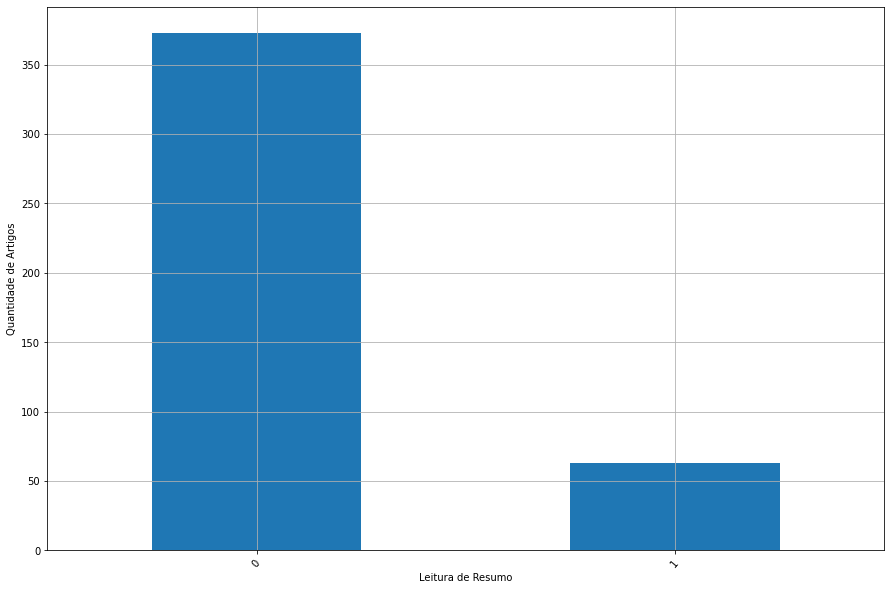

In [13]:
# colocar leganda 0 nao lido e 1 lido
plt.figure(figsize=(15,10))
leitura_resumo.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Leitura de Resumo")
plt.ylabel("Quantidade de Artigos")
plt.grid()
plt.show()

# Artigos que podem entrar e nao entrou

- Pharmacovigilance in the era of social media: Discovering adverse drug events cross-relating Twitter and PubMed 
<br>(ao pesquisar   TITLE-ABS-KEY ( mining  AND for  AND adverse  AND drug  AND events  AND on  AND twitter ) ) = 28 resultados
- Detection of adverse drug reaction from twitter data
    - e outros com a query acima
- SSEL-ADE: A semi-supervised ensemble learning framework for extracting adverse drug events from social media, mesmo autor de um artigo interessante da pesquisa ()
- Adaptation of algorithms for medical information retrieval for working on russian-language text content



# Curiosidades

**dois artigos?**
<br>

Erratum to: Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter (Drug Safety DOI: 10.1007/s40264-014-0155-x)

<br>

Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter

In [16]:
import os
os.remove(r'C:\Users\luizp\jupyter-notebook\SisCRI\data\jpg\20180605122107UPdb352ae9833048c09a662ed1d1b4fe40-10.jpg')

# Exportação do resultado para Excel

## Planilhas

## Planilha de Resultado

# Analises

In [14]:
data_fim = pd.Timestamp.now()
print(data_inicio)
print(data_fim)

2021-06-24 19:17:12.309256
2021-06-24 19:17:14.264480
